                                                                                                        Рычко Артем (БЭК155)

1. Экспериментально показать, что RW модель работает некорректно в случае Pt=Pt-1+N(m, G), корректная версия должна быть обязательно на логарифмах, т.е. pt=pt-1+N(m, G)
2. Экспериментально показать, что эксцесс и толстые хвосты могут быть разумно объяснены в рамках гипотезы о нормальном распределении логарифмической доходности. (подсказка - см. корректировку лог. доходности на скользящее СКО, и соотв. полученного ряда нормальному распределению)
3. Построить прогноз по RW модели на срок 1/3 от имеющихся данных. Взять любую акцию или фондовый индекс.

В качестве данных используются закрывающие день цены акций корпарации Alphabet (Google) - 'GOOG'. Будем использовать дневные значения только за 2017 год

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

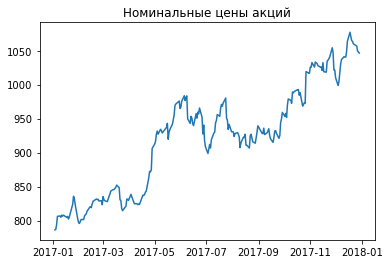

In [2]:
data = quandl.get("WIKI/GOOG")
data = data.loc[(data.index > '2017-01-01') & (data.index < '2018-01-01')]
data = data['Close']
data = pd.DataFrame(data)
plt.plot(data.index, data.Close)
plt.title('Номинальные цены акций')
plt.show()

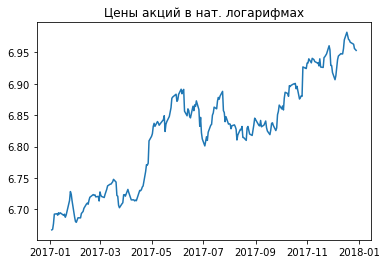

In [3]:

plt.plot(data.index, data.Close.apply(lambda x: np.log(x)))
plt.title('Цены акций в нат. логарифмах')
plt.show()

In [5]:
print('Средняя цена акций за год:', np.mean(data.Close.values),', Средняя доходность акции за год, включающий только рабочие дни: ', np.mean(data.Close.pct_change().dropna().values*100))

Средняя цена акций за год: 921.309616 , Средняя доходность акции за год, включающий только рабочие дни:  0.119592628057


1 задание


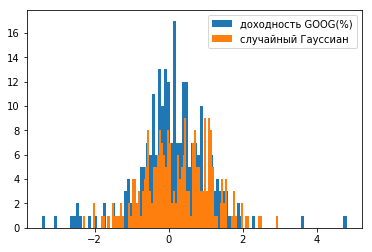

In [4]:
data1 = data.pct_change()*100
vec = np.random.randn(249)*np.var(data1.Close.dropna().values)+np.mean(data1.Close.dropna().values)
plt.hist(data1.Close.dropna().values, bins = 100)
plt.hist(vec, bins = 100)
plt.legend(('доходность GOOG(%)', 'случайный Гауссиан'))
plt.show()

Можем видеть эксцесс в два раза больше гауссиана с данным средним и дисперсией, а также более тяжелые хвосты в распределении реальных значений. Сущесвующая  асимметрия в левую часть говорит о преобладании отрицательных изменений в ценах акций.  

3 задание
Этапы:
1) Логарифмирование
2) Проверка на стационарность
3) Проверка на независимость 
4) Оценка вида распределения и Построение RW model на 4 месяца вперед

1) p(t) = ln(Pt) - ln(Pt-1)
Медиана доходности: 0.00143931330215 , Среднее занчение доходности: 0.00121743847394


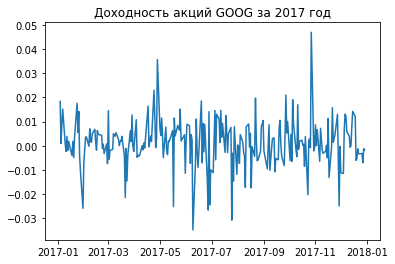

In [6]:
print('''1) p(t) = ln(Pt) - ln(Pt-1)''')
data_ = quandl.get("WIKI/GOOG")
data_ = data_.loc[(data_.index > '2016-12-29') & (data_.index < '2017-12-29')]
data['yield'] =(pd.DataFrame(data.Close.apply(lambda x: np.log(x))).Close.values - pd.DataFrame(data_.Close.apply(lambda x: np.log(x))).Close.values)
print('Медиана доходности:', np.median(data['yield'].values), ", Среднее занчение доходности:", np.mean(data['yield'].values))
plt.plot(data['yield'])
plt.title('Доходность акций GOOG за 2017 год')
plt.show()

In [8]:
print('''2) Проверка на независимость среднего и дисперсии от времени, Проверем через корреляцию (Pt, Pt-1)''')
past = data[0:-1]['yield'].values
present = data[1:]['yield'].values

print('корреляция равна = ', np.corrcoef(present, past)[1][0], '=> таким образом ряд стационарен')

2) Проверка на независимость среднего и дисперсии от времени, Проверем через корреляцию (Pt, Pt-1)
корреляция равна =  0.0384425684401 => таким образом ряд стационарен


In [9]:
print('''3) Проверка на независимость сегодняшних значений для будущих через t-test, где t_observed = corr(t, t-1)*sqrt((n-2)/(1 - corr^2))''')
from scipy import stats
corr = np.corrcoef(present, past)[1][0]
n = len(data['yield'].values)
res = corr*np.sqrt((n-2)/(1 - corr**2))
t_stat = stats.t.ppf(1-0.2, n)
print('Наблюдаемая статистика Стьюдента равна', res, ", что меньше табличного {} на 20% уровне значимости, следовательно не можем отвергать равенство матожидания ряда от 0 => используем дальше RW model".format(t_stat))

3) Проверка на независимость сегодняшних значений для будущих через t-test, где t_observed = corr(t, t-1)*sqrt((n-2)/(1 - corr^2))
Наблюдаемая статистика Стьюдента равна 0.605842004774 , что меньше табличного 0.8430613607402951 на 20% уровне значимости, следовательно не можем отвергать равенство матожидания ряда от 0 => используем дальше RW model


In [10]:
print('''4) Определение распределения и использование RW модели''')
mean_x = np.mean(data['Close'].values)
n = len(data['yield'].values)


4) Определение распределения и использование RW модели


In [12]:
print('Волатильность доходности: {}.'.format(np.var(data['yield'].values)), "Средняя доходность: {}%".format(np.mean(data['yield'].values)*100))

Волатильность доходности: 9.425245947282276e-05. Средняя доходность: 0.1217438473944334%


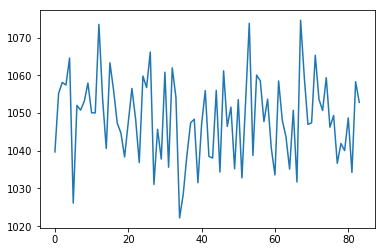

In [13]:
X = data['Close'][-1]*np.math.e**(np.random.randn(round(252/3))*np.var(data['yield'].values)**0.5 + np.mean(data['yield'].values))

plt.plot(X)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1907: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1908: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


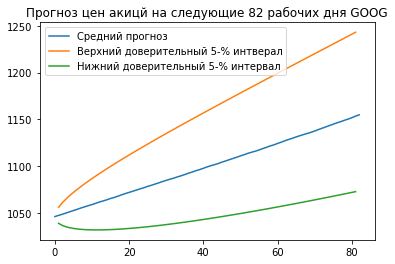

In [14]:
from scipy import stats
sko =(np.var(data['yield'].values))
mean_ = np.mean(data['yield'].values)
P_o = data['Close'][-1]
t = stats.t.ppf(0.95, 252)


xup = []
xlow = []
for n in range(0, 82):
    norm_d1 = stats.norm.ppf(0.8, loc=mean_*n, scale=(sko*n)**0.5)
    xup.append(P_o*np.math.exp((norm_d1)))
    norm_d2 = stats.norm.ppf(0.2, loc=mean_*n, scale=(sko*n)**0.5)
    xlow.append(P_o*np.math.exp((norm_d2)))
    
    

imi = [np.math.exp(x) for x in np.random.normal(mean_,sko, 82)] 
imit = [P_o]
for im in imi:
    imit.append(imit[-1]*im)
plt.plot(imit)
plt.plot(xup)
plt.plot(xlow)
plt.title('Прогноз цен акицй на следующие 82 рабочих дня GOOG')
plt.legend(('Средний прогноз', 'Верхний доверительный 5-% интверал', 'Нижний доверительный 5-% интервал'))
plt.show()

#иммитацонный прогноз
#X = data['Close'][-1]*np.math.e(np.random.randn(round(252/3))*np.var(data['yield'].values)**0.5 + np.mean(data['yield'].values))


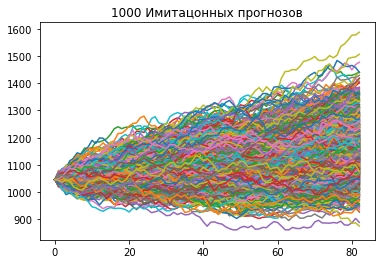

In [37]:
for i in range(1, 1000):
    price_list = [P_o]
    daily_returns=[x+1 for x in np.random.normal( mean_,sko*100,82)]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
plt.title('1000 Имитацонных прогнозов')
plt.show()

1) Задание
Будем использовать номинальные значения в случае Pt=Pt-1+N(m, G), хотя корректная версия в логарифмах, т.е. pt=pt-1+N(m, G)

Попробуем построить прогноз по модели случайного блуждания, используя номинальные значения, а не их логарифмы:

Pt = Pt-1 + N(μ,σ) Pt = P0+ N(μ*t,σ*корень(t))

где N(μ,σ) = Pt - Pt-1. Посчитаем μ и σ для этого выражения: μ = , σ = .

Не ясно, исходя из каких соображений, мы можем пользоваться предложенной моделью. Необходимо проверить, что Pt - Pt-1 распределено нормально, и удовлетворяет условиям для использования вышеуказанной модели случайного блуждания.

Построим гистограмму «абсолютных приростов котировок» и сравним ее с гистограммой нормального распределения.

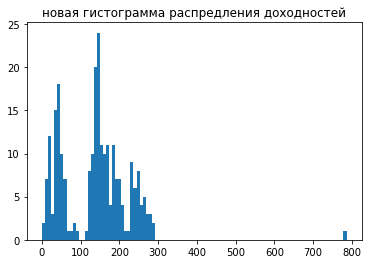

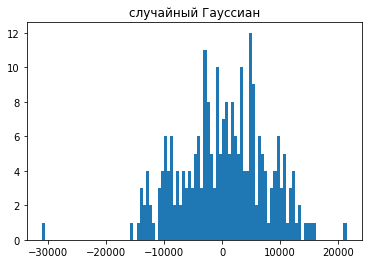

In [18]:
new_prices = [data.Close[0]]
np.random.normal( mean_,sko,82)
for price in list(data[1:].Close.values):
    new_prices.append(price - new_prices[0])
plt.hist(new_prices, bins = 100)
plt.title('новая гистограмма распредления доходностей')
plt.show()
vec = np.random.randn(249)*np.var(new_prices)+np.mean(new_prices)
plt.hist(vec, bins = 100)
plt.title('случайный Гауссиан')
plt.show()

Можем заметить большие смещения от нормального распределения.

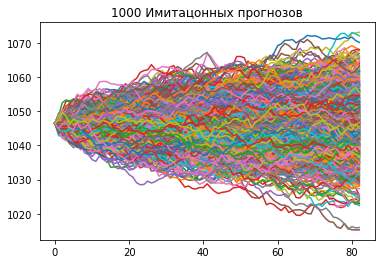

In [42]:
for i in range(1, 1000):
    price_list = [data.Close[-1]]
    daily_returns=[x for x in np.random.normal( mean_,100*sko**0.5,82)]
    for daily in daily_returns:
        price_list.append(price_list[-1] + daily)
    plt.plot(price_list)
plt.title('1000 Имитацонных прогнозов')
plt.show()


Можем заметить увелечение волатильности имитационных прогнозов, что говорит о нестоятельности оценок.

2) задание


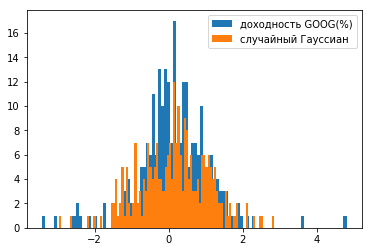

In [19]:
data1 = data.pct_change()*100
vec = np.random.randn(249)*np.var(data1.Close.dropna().values)+np.mean(data1.Close.dropna().values)
plt.hist(data1.Close.dropna().values, bins = 100)
plt.hist(vec, bins = 100)
plt.legend(('доходность GOOG(%)', 'случайный Гауссиан'))
plt.show()

По графику виден эксцесс и толстые хвосты, которые являются следствием волатильности цен акций во времени. Резкие и длиные скачки доходности акций являются причиной появлеения эксцессов и толстых хостов. 

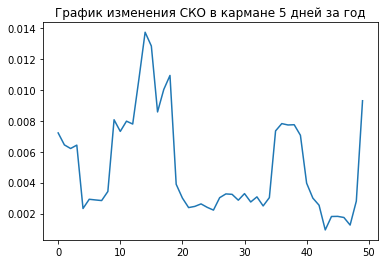

In [20]:
volat = []
for i in range(0, round(252/5)):
    volat.append(np.var(data[i:i+5]['yield'].values)**0.5)
plt.plot(volat)
plt.title('График изменения СКО в кармане 5 дней за год')
plt.show()

По графику скользящего СКО видно, что на протяжении рассматриваемого периода изменчивость котировок постоянно менялась: то становилась очень высокой, то падала ниже среднего значения. Это и объясняет наличие избыточного эксцесса и «толстых хвостов». Ведь гистограмма нормального распределения строилась, исходя из предположения о постоянном СКО. Однако в нашем случае, сильное повышение скользящего СКО приводит к большей вероятности сильных отклонений от среднего, а снижение скользящего СКО приводит к большей вероятности небольших отклонений.